In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/tabular-playground-series-jul-2022/sample_submission.csv
/kaggle/input/tabular-playground-series-jul-2022/data.csv


In [2]:
df = pd.read_csv('/kaggle/input/tabular-playground-series-jul-2022/data.csv')

In [ ]:
df.head()

In [9]:
df = df.drop('id',axis=1)

In [11]:
len(df)

98000

In [12]:
df.columns

Index(['f_00', 'f_01', 'f_02', 'f_03', 'f_04', 'f_05', 'f_06', 'f_07', 'f_08',
       'f_09', 'f_10', 'f_11', 'f_12', 'f_13', 'f_14', 'f_15', 'f_16', 'f_17',
       'f_18', 'f_19', 'f_20', 'f_21', 'f_22', 'f_23', 'f_24', 'f_25', 'f_26',
       'f_27', 'f_28'],
      dtype='object')

In [13]:
df.isnull().sum()

f_00    0
f_01    0
f_02    0
f_03    0
f_04    0
f_05    0
f_06    0
f_07    0
f_08    0
f_09    0
f_10    0
f_11    0
f_12    0
f_13    0
f_14    0
f_15    0
f_16    0
f_17    0
f_18    0
f_19    0
f_20    0
f_21    0
f_22    0
f_23    0
f_24    0
f_25    0
f_26    0
f_27    0
f_28    0
dtype: int64

In [14]:
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture

In [15]:
import sklearn.metrics as metrics
import sklearn.cluster as cluster

## 1.Using the original Dataset

# K-Means Clustering Method

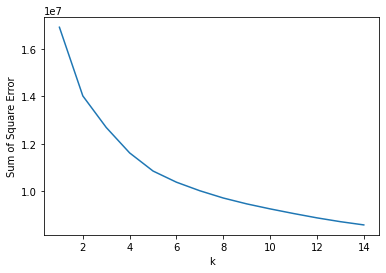

In [17]:
import matplotlib.pyplot as plt
k_range1 = range(1,15)
sse1 = []
for k in k_range1:
    km = KMeans(n_clusters=k)
    km.fit(df)
    sse1.append(km.inertia_)
plt.xlabel('k')
plt.ylabel('Sum of Square Error')
plt.plot(k_range1,sse1)

In [18]:

for i in range(2,20):
    labels = cluster.KMeans(n_clusters=i, init='k-means++',random_state=200).fit(df).labels_
    print('For k={} Silhouette Score is'.format(i), (metrics.silhouette_score(df, labels, metric='euclidean',sample_size=1000,random_state=200)))

For k=2 Silhouette Score is 0.18120533558484467
For k=3 Silhouette Score is 0.13241823467845856
For k=4 Silhouette Score is 0.1251256401304193
For k=5 Silhouette Score is 0.11668120671023711
For k=6 Silhouette Score is 0.1169623389649247
For k=7 Silhouette Score is 0.10827491017688605
For k=8 Silhouette Score is 0.10188718784100481
For k=9 Silhouette Score is 0.09557846591905132
For k=10 Silhouette Score is 0.09725650500392291
For k=11 Silhouette Score is 0.09439872186929635
For k=12 Silhouette Score is 0.09247938179380247
For k=13 Silhouette Score is 0.0910731603645638
For k=14 Silhouette Score is 0.08466459313012173
For k=15 Silhouette Score is 0.08299939138907235
For k=16 Silhouette Score is 0.081314727690167
For k=17 Silhouette Score is 0.082902299439613
For k=18 Silhouette Score is 0.08110468891606672
For k=19 Silhouette Score is 0.08015080305649068


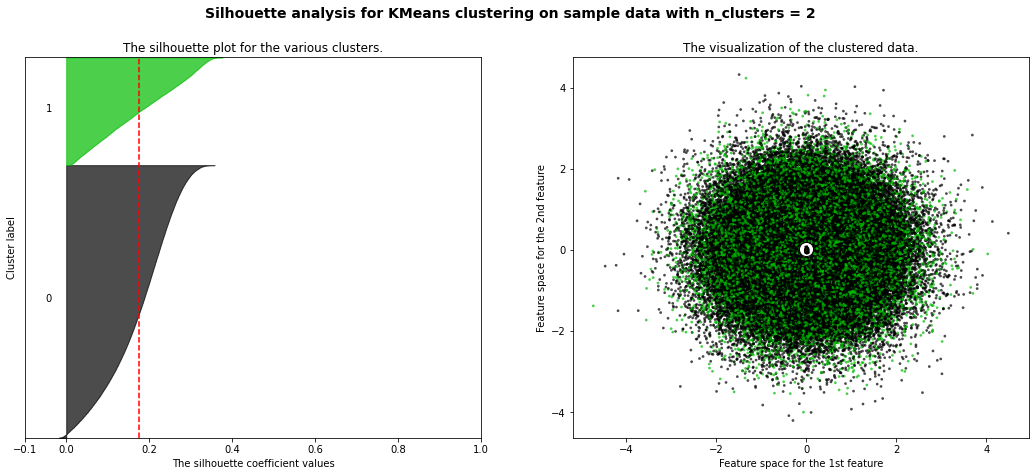

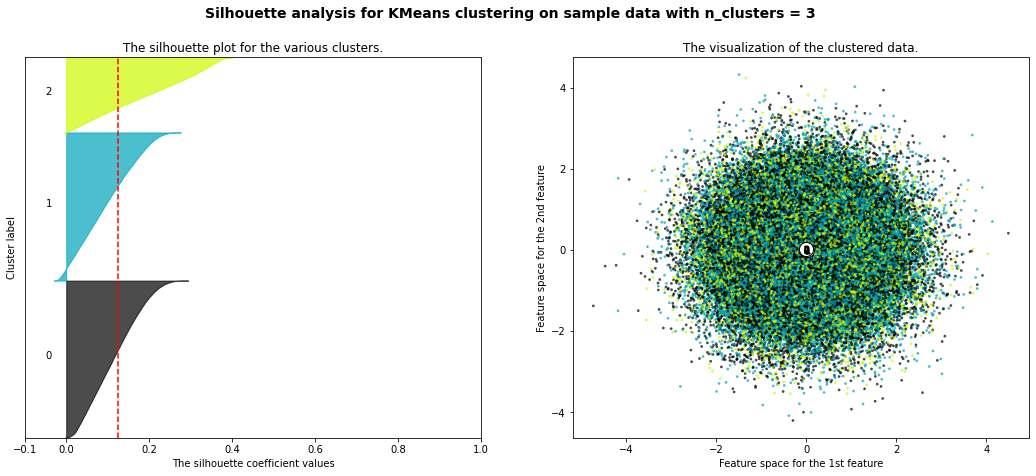

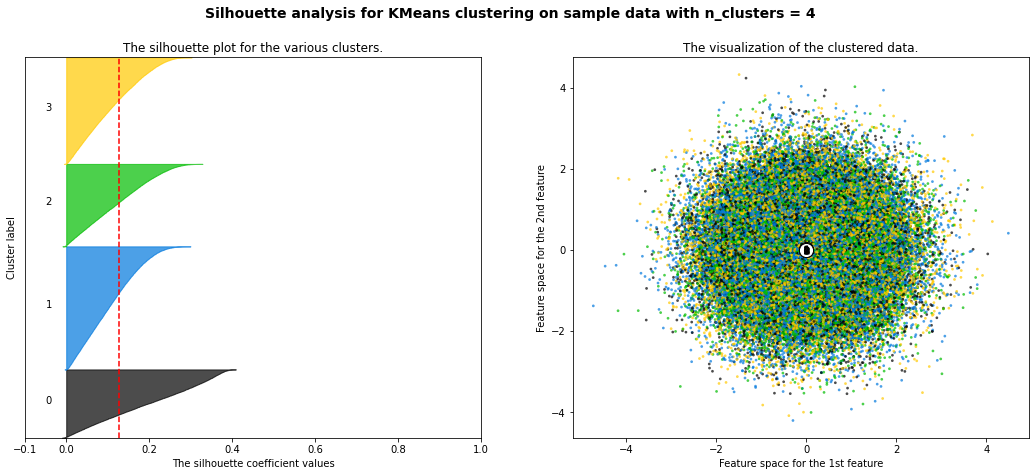

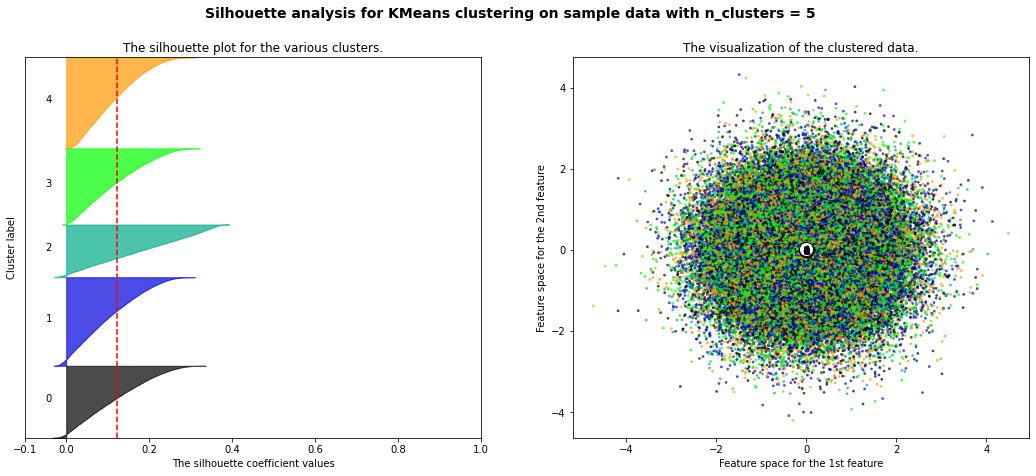

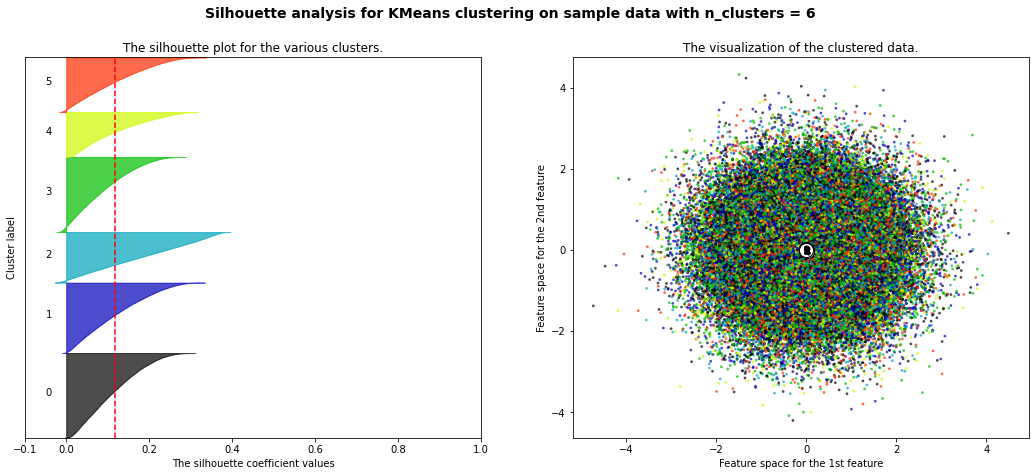

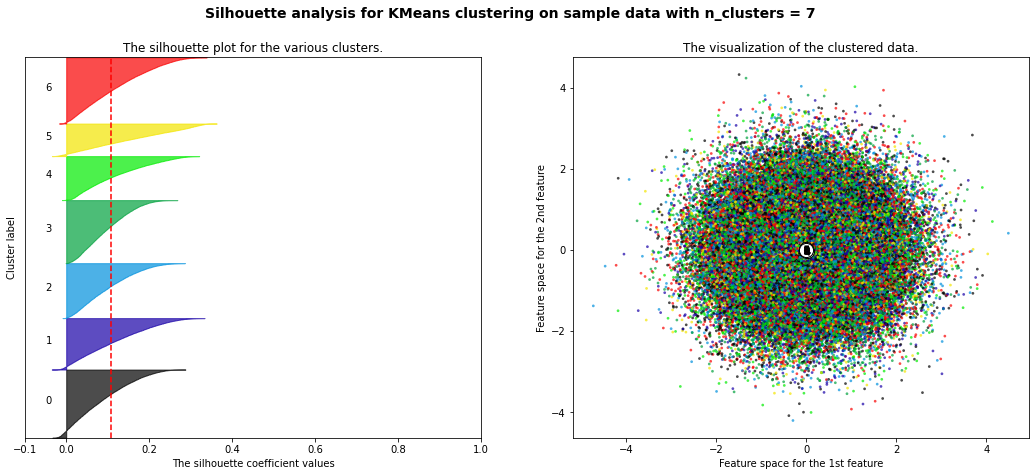

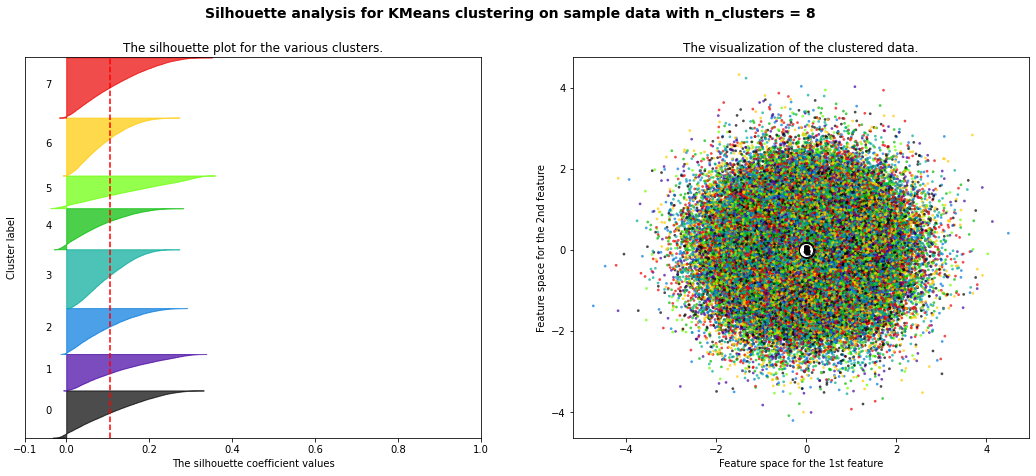

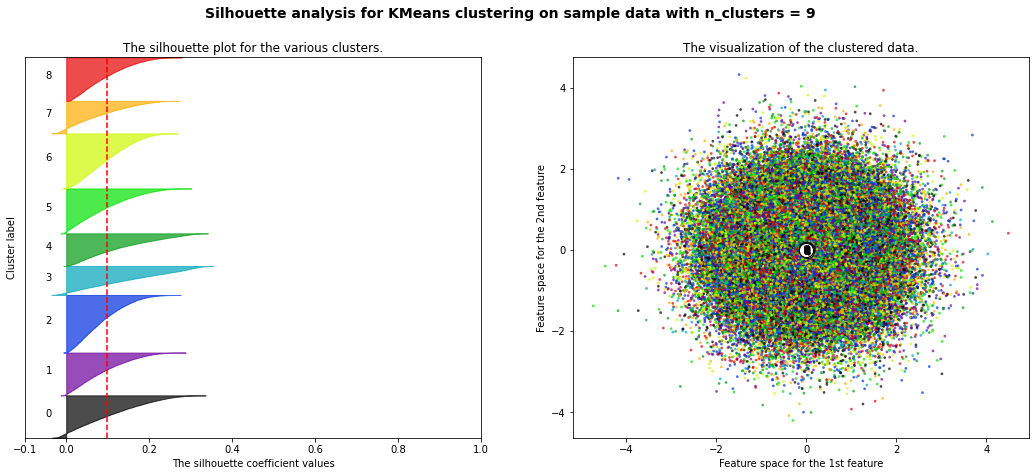

In [19]:
# KMeans Silhoutte Score
range_n_clusters = [i for i in range(2,10)]
X = df
X = X.values.tolist()
X = np.array(X)

from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)
    
    silhouette_avg = silhouette_score(X, cluster_labels)
    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    #centers = clusterer.n_components_centers_
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

The clustering is showing poor results, and this might be because of the fact that the clusters should have an overlap. And, K-Means algorithm is not good 
at clustering groups with overlap in the dataset. Lets try another method called 'Gaussian Mixtures', which is able to cluster groups with overlap.

## Gaussian Mixture Clustering Method

In [ ]:
#range1 = range(1,15)
#sse = []
#for k in range1:
    #gm = GaussianMixture(n_components=k)
    #gm.fit(df)
    #sse.append(gm.inertia_)
#plt.xlabel('k')
#plt.ylabel('Sum of Square Error')
#plt.plot(range1,sse)

In [20]:
# Average Silhouette Distance
for i in range(2,20):
    labels = GaussianMixture(n_components=i,random_state=200).fit(df).predict(df)
    print('For k={} Silhouette Score is'.format(i), (metrics.silhouette_score(df, labels, metric='euclidean',sample_size=1000,random_state=200)))

For k=2 Silhouette Score is 0.1352374011517755
For k=3 Silhouette Score is 0.0978661629308339
For k=4 Silhouette Score is 0.0876582922505762
For k=5 Silhouette Score is 0.08297469221817005
For k=6 Silhouette Score is 0.06881433063152104
For k=7 Silhouette Score is 0.06133422944109274
For k=8 Silhouette Score is 0.05033870512992208
For k=9 Silhouette Score is 0.0488360809015215
For k=10 Silhouette Score is 0.04070817037108745
For k=11 Silhouette Score is 0.040839120746560625
For k=12 Silhouette Score is 0.03455869982657957
For k=13 Silhouette Score is 0.029103222416723234
For k=14 Silhouette Score is 0.031020741918694653
For k=15 Silhouette Score is 0.022583719959702677
For k=16 Silhouette Score is 0.005888940758561441
For k=17 Silhouette Score is 0.02475950452489738
For k=18 Silhouette Score is 0.005803442586548881
For k=19 Silhouette Score is 0.0058607937577827


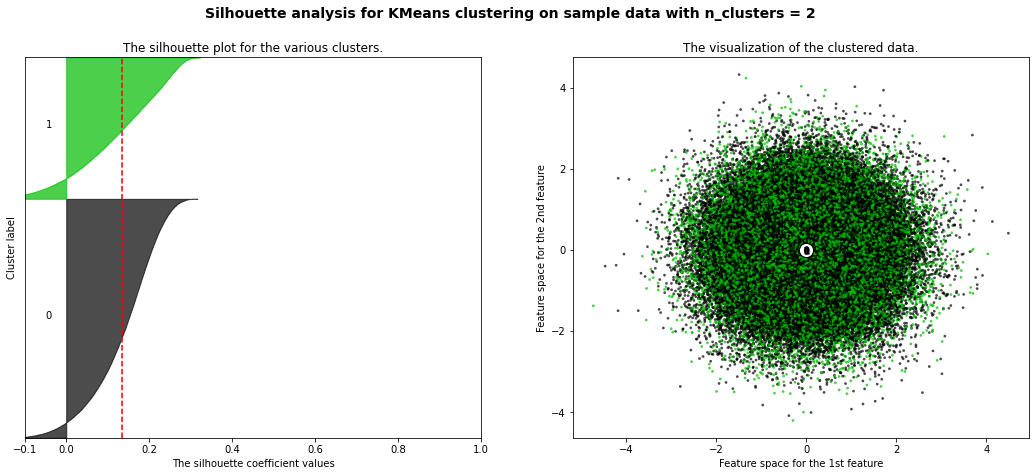

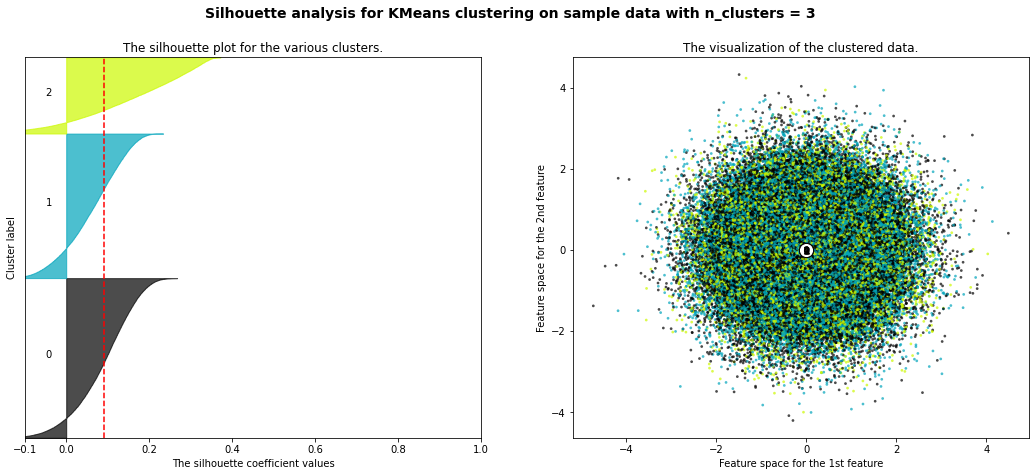

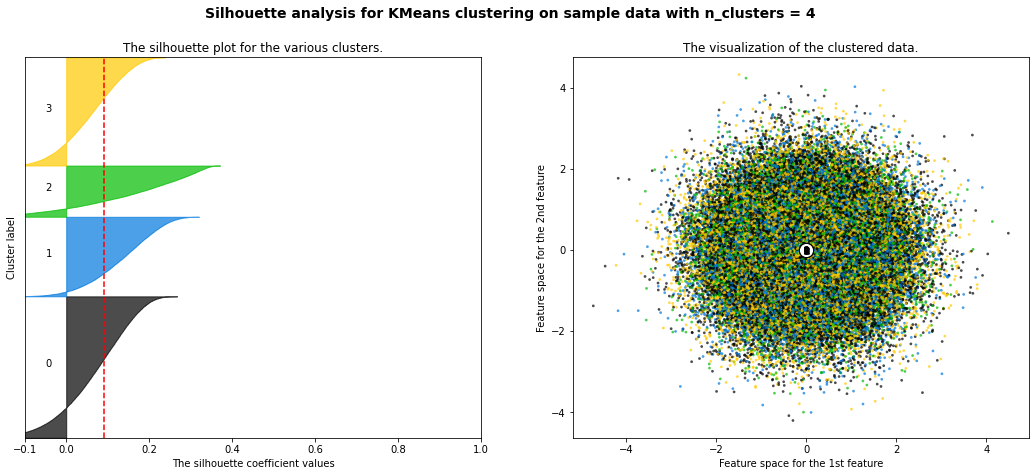

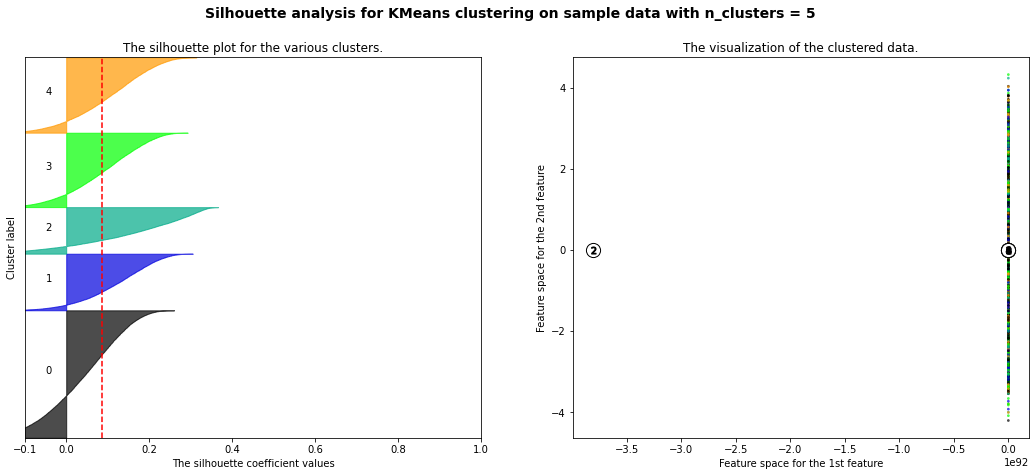

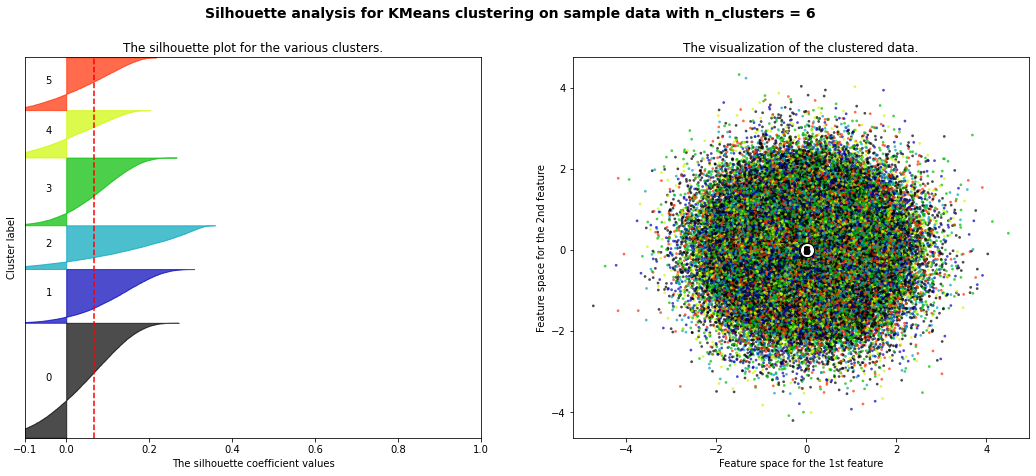

In [21]:
range_n_clusters = [i for i in range(2,7)]
X = df
X = X.values.tolist()
X = np.array(X)

from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = GaussianMixture(n_components=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)
    
    silhouette_avg = silhouette_score(X, cluster_labels)
    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    #centers = clusterer.n_components_centers_
    #centers = np.empty(shape=(gmm.n_components, X.shape[1]))
    centers = np.empty(shape=(clusterer.n_components, X.shape[1]))
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for Gaussian Mixture clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

## 2.Using PCA for transforming the Dataset

In [22]:
from sklearn.decomposition import PCA

In [29]:
pca = PCA(n_components=15)
pca.fit(df)
x_pca = pca.transform(df)

In [24]:
np.shape(x_pca)

(98000, 10)

In [38]:
pca.explained_variance_ratio_

array([0.25818138, 0.15027922, 0.13720861, 0.08701423, 0.07864965,
       0.07283724, 0.04087769, 0.01638825, 0.01542493, 0.01326701,
       0.01216783, 0.01106626, 0.01014076, 0.00936158, 0.00590752])

## K-Means Clustering Method

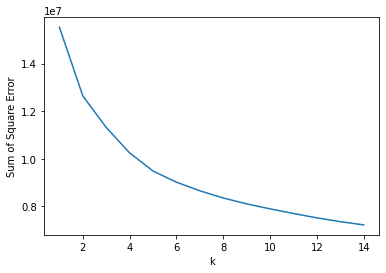

In [31]:
K_range1 = range(1,15)
Sse1 = []
for k in K_range1:
    km = KMeans(n_clusters=k)
    km.fit(x_pca)
    Sse1.append(km.inertia_)
plt.xlabel('k')
plt.ylabel('Sum of Square Error')
plt.plot(K_range1,Sse1)

In [32]:
for i in range(2,20):
    labels = cluster.KMeans(n_clusters=i, init='k-means++',random_state=200).fit(x_pca).labels_
    print('For k={} Silhouette Score is'.format(i), (metrics.silhouette_score(x_pca, labels, metric='euclidean',sample_size=1000,random_state=200)))

For k=2 Silhouette Score is 0.19674593645884283
For k=3 Silhouette Score is 0.14653280615680114
For k=4 Silhouette Score is 0.139568373405731
For k=5 Silhouette Score is 0.13127469729480173
For k=6 Silhouette Score is 0.1320037089317907
For k=7 Silhouette Score is 0.1235157255192635
For k=8 Silhouette Score is 0.1162972293843106
For k=9 Silhouette Score is 0.10996327055155262
For k=10 Silhouette Score is 0.11227027348562811
For k=11 Silhouette Score is 0.10862037280104782
For k=12 Silhouette Score is 0.10991712329544875
For k=13 Silhouette Score is 0.10572276773293196
For k=14 Silhouette Score is 0.09890058656187437
For k=15 Silhouette Score is 0.09691198500199431
For k=16 Silhouette Score is 0.09464597967389606
For k=17 Silhouette Score is 0.0974184073254716
For k=18 Silhouette Score is 0.09441757320216236
For k=19 Silhouette Score is 0.09420199494575136


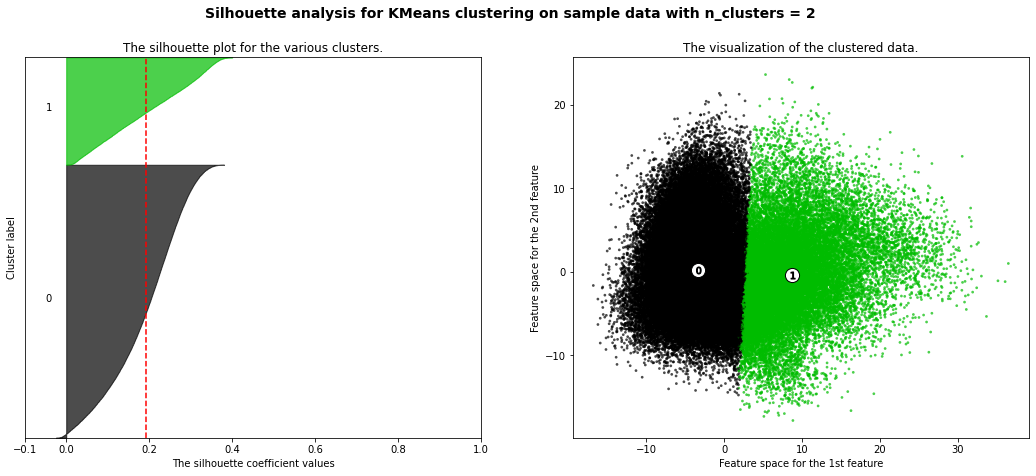

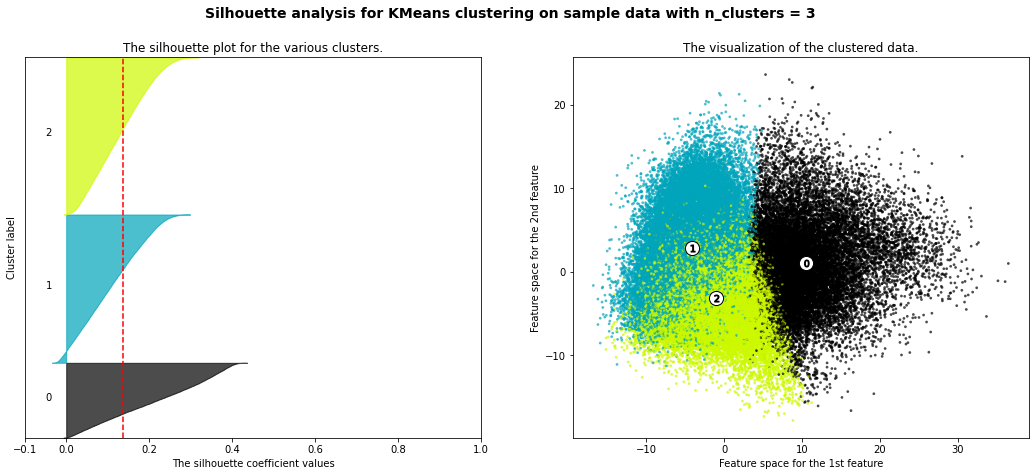

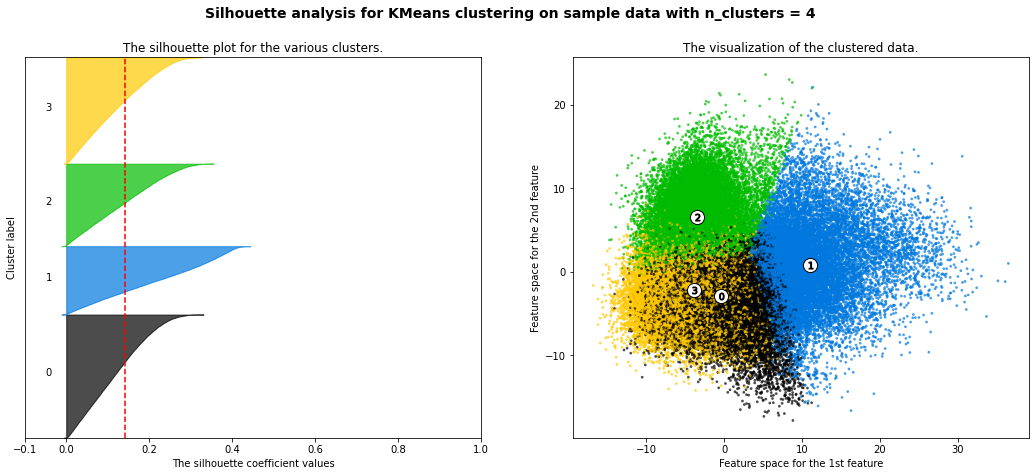

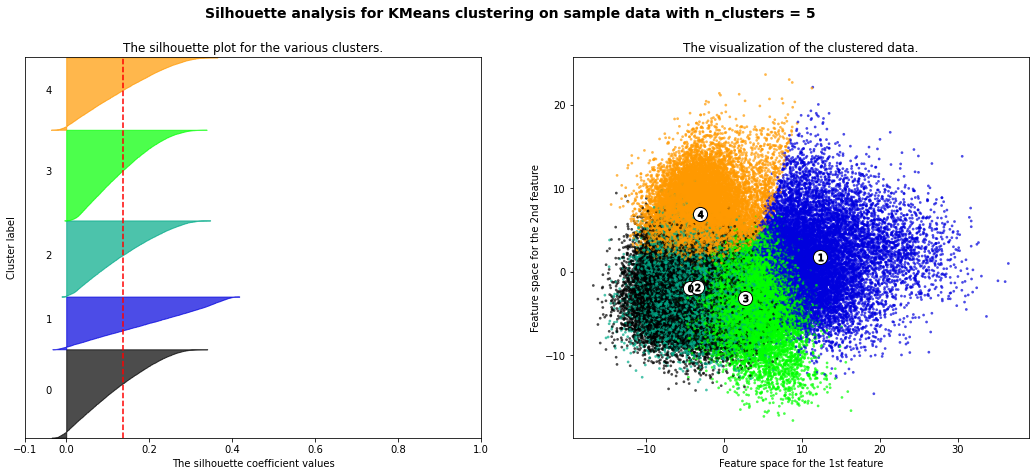

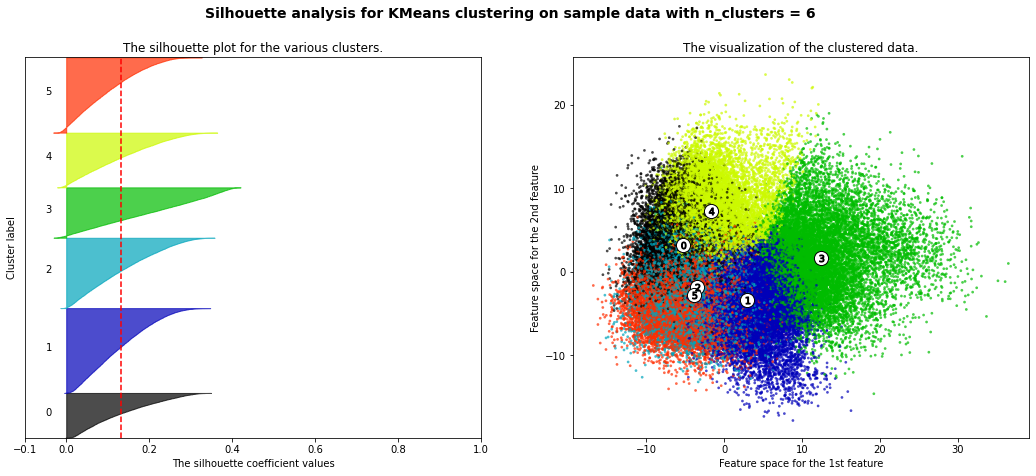

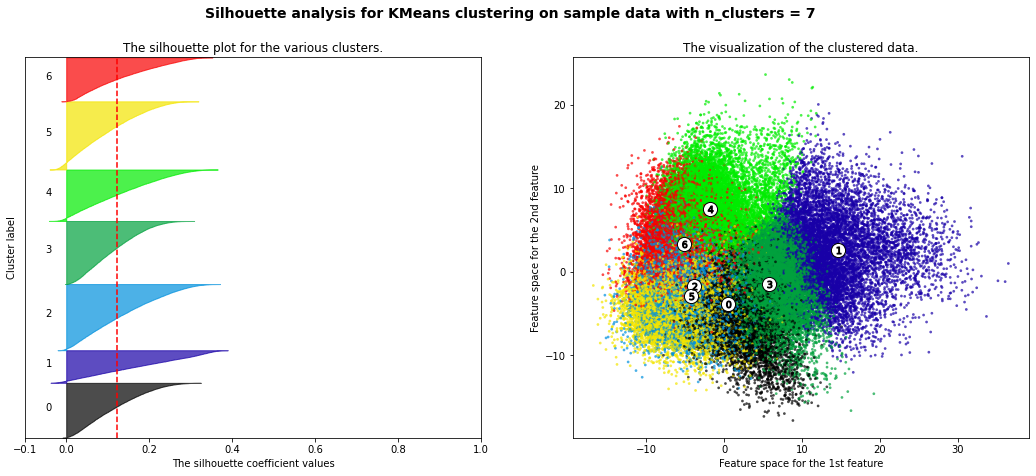

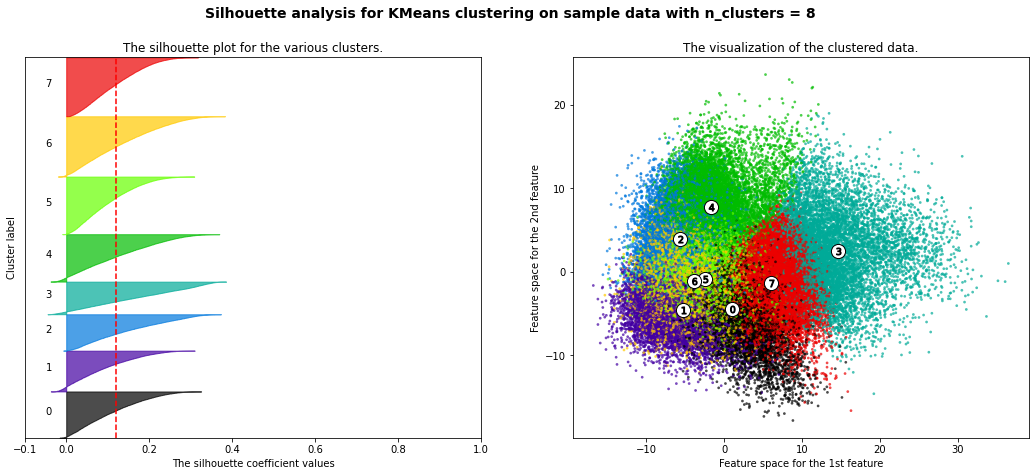

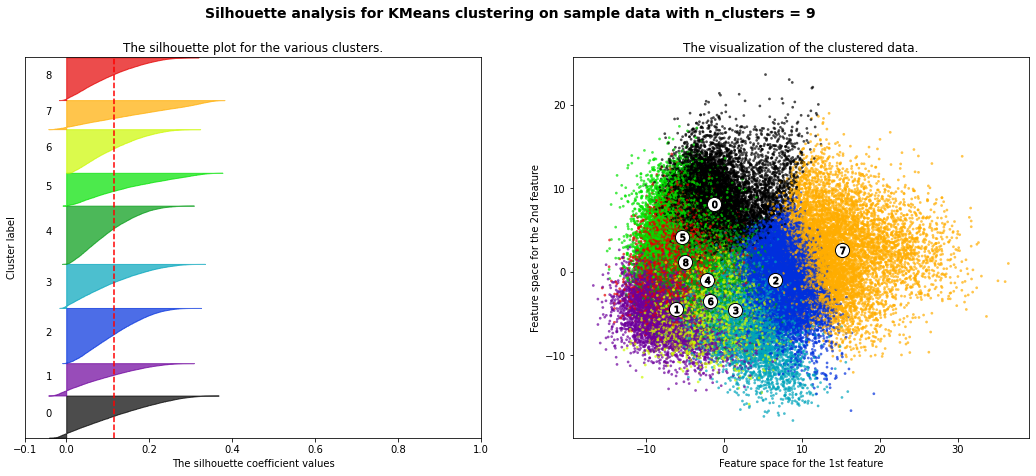

In [35]:
range_n_clusters = [i for i in range(2,10)]
X = x_pca
#X = X.values.tolist()
#X = np.array(X)

from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)
    
    silhouette_avg = silhouette_score(X, cluster_labels)
    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    #centers = clusterer.n_components_centers_
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

## Gaussian Mixture Clustering Method

In [36]:
for i in range(2,20):
    labels = GaussianMixture(n_components=i,random_state=200).fit(x_pca).predict(x_pca)
    print('For k={} Silhouette Score is'.format(i), (metrics.silhouette_score(x_pca, labels,metric='euclidean',sample_size=1000,random_state=200)))

For k=2 Silhouette Score is 0.14825119506794493
For k=3 Silhouette Score is 0.10870024061839416
For k=4 Silhouette Score is 0.09743958665312827
For k=5 Silhouette Score is 0.09326415158405016
For k=6 Silhouette Score is 0.07873803545188875
For k=7 Silhouette Score is 0.07013371680680527
For k=8 Silhouette Score is 0.05864751724200856
For k=9 Silhouette Score is 0.04889950945704542
For k=10 Silhouette Score is 0.04807668795128185
For k=11 Silhouette Score is 0.038926041765126984
For k=12 Silhouette Score is 0.03614210110799235
For k=13 Silhouette Score is 0.02509170611280534
For k=14 Silhouette Score is 0.021266719427970142
For k=15 Silhouette Score is 0.027231881829330718
For k=16 Silhouette Score is 0.010894191325575325
For k=17 Silhouette Score is 0.03285826399503617
For k=18 Silhouette Score is 0.0036453398250110413
For k=19 Silhouette Score is 0.003701604924007852


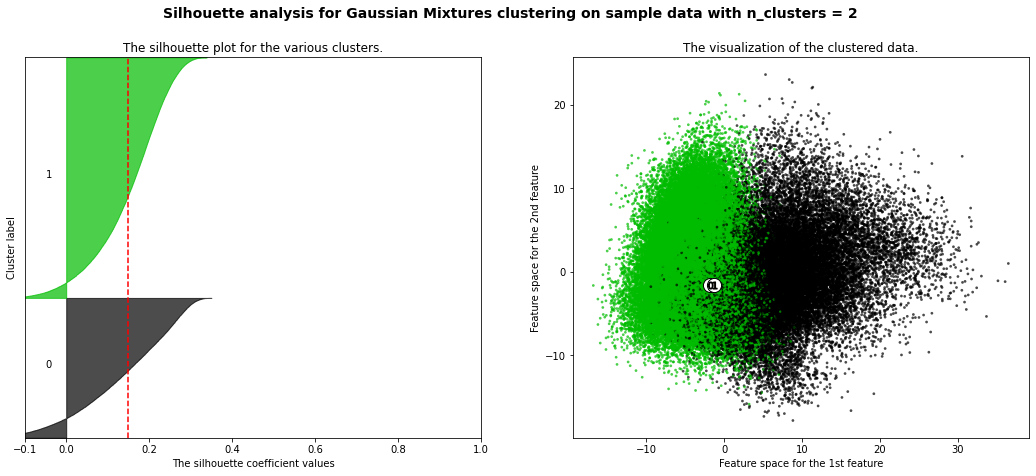

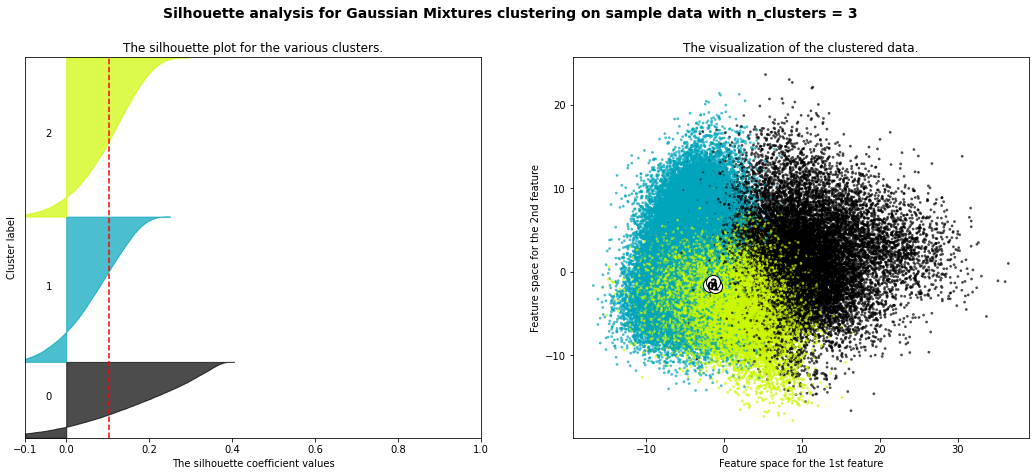

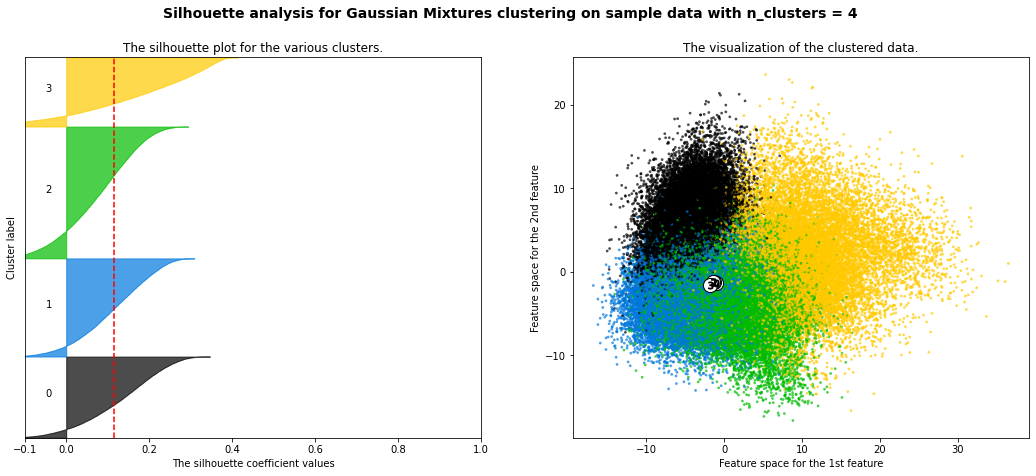

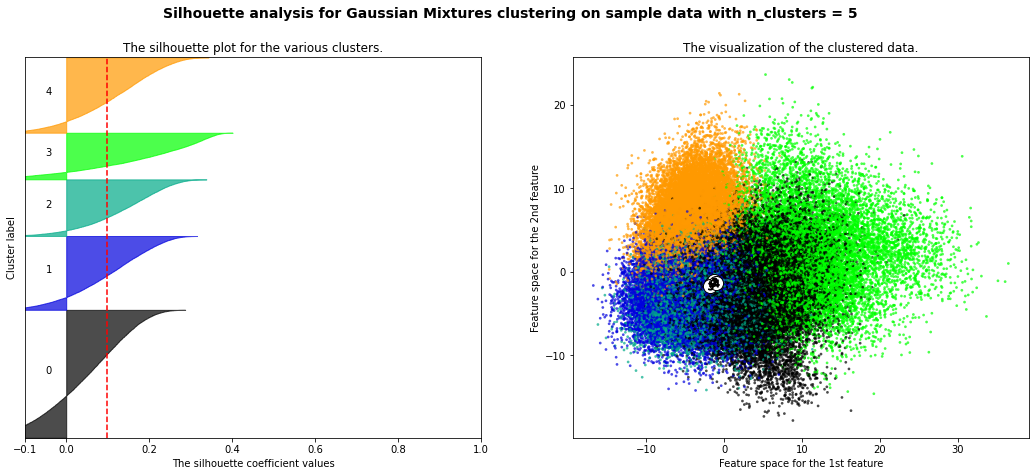

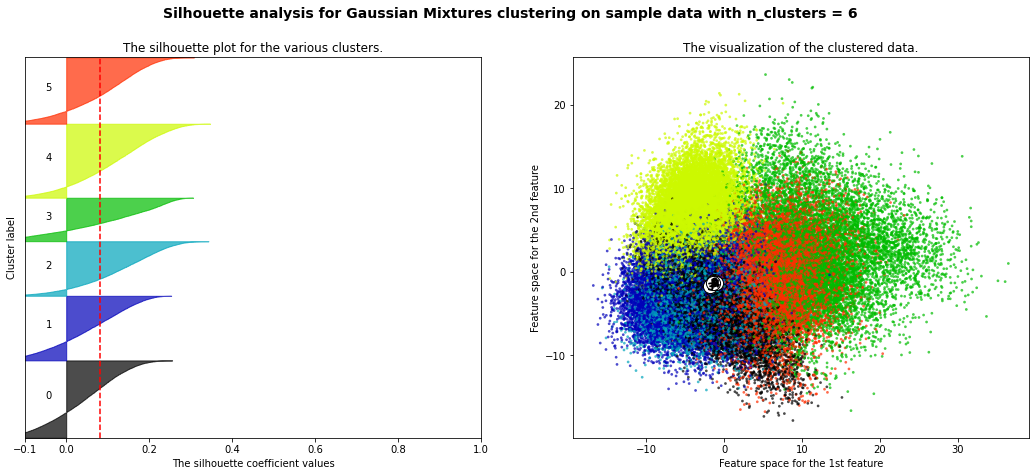

In [37]:
range_n_clusters = [i for i in range(2,7)]
X = x_pca
#X = X.values.tolist()
#X = np.array(X)

from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = GaussianMixture(n_components=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)
    
    silhouette_avg = silhouette_score(X, cluster_labels)
    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    #centers = clusterer.n_components_centers_
    #centers = np.empty(shape=(gmm.n_components, X.shape[1]))
    centers = np.empty(shape=(clusterer.n_components, X.shape[1]))
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for Gaussian Mixtures clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()